In [34]:
import pandas as pd
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, classification_report, recall_score, roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, OrdinalEncoder

# Data preprocessing
## Assign labels

In [27]:
df = pd.read_csv("train_data.csv")
df.head()

,SalePrice,YearBuilt,Size(sqf),Floor,HallwayType,HeatingType,AptManageType,N_Parkinglot(Ground),N_Parkinglot(Basement),TimeToBusStop,TimeToSubway,N_manager,N_elevators,SubwayStation,N_FacilitiesInApt,N_FacilitiesNearBy(Total),N_SchoolNearBy(Total)
0,141592,2006,814,3,terraced,individual_heating,management_in_trust,111.0,184.0,5min~10min,10min~15min,3.0,0.0,Kyungbuk_uni_hospital,5,6.0,9.0
1,51327,1985,587,8,corridor,individual_heating,self_management,80.0,76.0,0~5min,5min~10min,2.0,2.0,Daegu,3,12.0,4.0
2,48672,1985,587,6,corridor,individual_heating,self_management,80.0,76.0,0~5min,5min~10min,2.0,2.0,Daegu,3,12.0,4.0
3,380530,2006,2056,8,terraced,individual_heating,management_in_trust,249.0,536.0,0~5min,0-5min,5.0,11.0,Sin-nam,5,3.0,7.0
4,78318,1992,644,2,mixed,individual_heating,self_management,142.0,79.0,5min~10min,15min~20min,4.0,8.0,Myung-duk,3,9.0,14.0


In [28]:
def classify(x):
    if x <= 100000:
        return 0
    if x <= 350000:
        return 1
    return 2

In [29]:
df["Label"] = df["SalePrice"].apply(classify)
df = df.drop(columns=["SalePrice"])
df.head()

,YearBuilt,Size(sqf),Floor,HallwayType,HeatingType,AptManageType,N_Parkinglot(Ground),N_Parkinglot(Basement),TimeToBusStop,TimeToSubway,N_manager,N_elevators,SubwayStation,N_FacilitiesInApt,N_FacilitiesNearBy(Total),N_SchoolNearBy(Total),Label
0,2006,814,3,terraced,individual_heating,management_in_trust,111.0,184.0,5min~10min,10min~15min,3.0,0.0,Kyungbuk_uni_hospital,5,6.0,9.0,1
1,1985,587,8,corridor,individual_heating,self_management,80.0,76.0,0~5min,5min~10min,2.0,2.0,Daegu,3,12.0,4.0,0
2,1985,587,6,corridor,individual_heating,self_management,80.0,76.0,0~5min,5min~10min,2.0,2.0,Daegu,3,12.0,4.0,0
3,2006,2056,8,terraced,individual_heating,management_in_trust,249.0,536.0,0~5min,0-5min,5.0,11.0,Sin-nam,5,3.0,7.0,2
4,1992,644,2,mixed,individual_heating,self_management,142.0,79.0,5min~10min,15min~20min,4.0,8.0,Myung-duk,3,9.0,14.0,0


## Check for missing values

In [30]:
def missing(df, columns):
    return {column: df[column].isnull().sum() for column in columns if df[column].isnull().sum() > 0}

In [31]:
missing(df, df.columns)

{}

# Categorical data

In [32]:
numeric_columns = df._get_numeric_data().columns
categorical_columns = list(set(df.columns) - set(numeric_columns))

In [8]:
def unique(df, columns):
    return {column: df[column].nunique() for column in columns}

In [9]:
categorical_unique = unique(df, categorical_columns)

In [10]:
numeric_unique = unique(df, numeric_columns)

In [19]:
def plot_bar(values, title):
    plt.figure(figsize=(2*len(values),4))
    plt.bar(*zip(*values.items()))
    plt.title(title)
    plt.show()

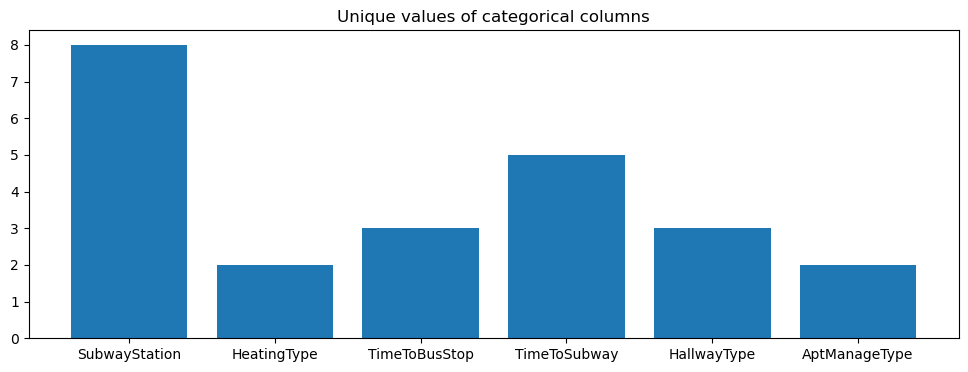

In [20]:
plot_bar(categorical_unique, "Unique values of categorical columns")

In [23]:
counts_by_label = dict(df["Label"].value_counts())
label_assignment = {0: "cheap (0)", 1:"average (1)", 2:"expensive (2)"}
counts_by_label = {label_assignment[key]: val for key, val in counts_by_label.items()}

In [26]:
ordinal_columns = ["TimeToBusStop", "TimeToSubway"]
nominal_columns = list(set(categorical_columns) - set(ordinal_columns))

## TODO: Check for outliers 
## TODO: Analyze if some features have normal distribution

## Analyzing the data imbalance

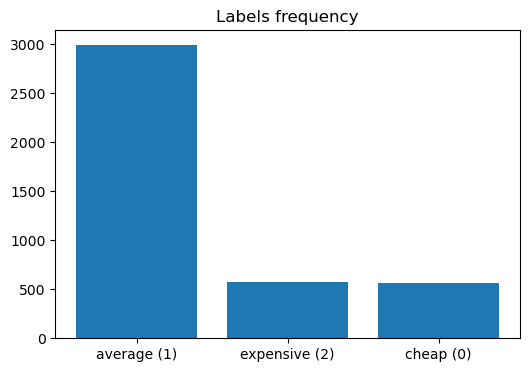

In [24]:
plot_bar(counts_by_label, "Labels frequency")

In [37]:
def preprocess(df, numeric_columns, ordinal_columns, nominal_columns):
    preprocessor = ColumnTransformer(transformers=[
        ("nominal", OneHotEncoder(handle_unknown="ignore"), nominal_columns),
        ("numeric_scaler", MinMaxScaler(), numeric_columns),
        ("ordinal", OrdinalEncoder(), ordinal_columns)
        ], remainder="passthrough")
    pipeline = Pipeline(steps=[
        ("preprocessing", preprocessor),
    ])
    pipeline.fit(df)
    return pipeline.transform(df)
#TODO check if ordinal encoding does ordering right

In [38]:
a = preprocess(df, numeric_columns, ordinal_columns, nominal_columns)

# Model and training

In [ ]:
class Model(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear()
